In [ ]:
from langchain_openai import AzureChatOpenAI
from dotenv import load_dotenv
import os
# Load environment variables from a .env file
load_dotenv()

# Fetch sensitive details from environment variables
azure_endpoint = os.getenv("AZURE_ENDPOINT")
openai_api_key = os.getenv("OPENAI_API_KEY")
deployment_name = os.getenv("DEPLOYMENT_NAME")
openai_api_version = os.getenv("OPENAI_API_VERSION")

# Define remaining kwargs
kwargs = {
    "azure_endpoint": azure_endpoint,
    "openai_api_version": openai_api_version,
    "openai_api_type": "azure",
    "openai_api_key": openai_api_key,
    "deployment_name": deployment_name,
    "request_timeout": 45.0,
    "max_retries": 1,
    "temperature": 0.0,
    "seed": 123,
    "streaming": True,
}

# Initialize the LLM
llm = AzureChatOpenAI(**kwargs)

In [2]:
ans = llm.stream("How was your Saturday? Eplxain the concept of Saturday in great detail")

for chunk in ans:
    print(chunk.content, end="|", flush=True)

||As| an| artificial| intelligence|,| I| don|'t| have| personal| experiences| or| emotions|,| so| I| don|'t| have| Saturdays| or| any| other| days|.| However|,| I| can| certainly| explain| the| concept| of| Saturday| to| you|.

|Saturday| is| the| sixth| day| of| the| week| according| to| the| international| standard| ISO| |860|1|.| However|,| in| many| cultures| and| religions|,| it| is| considered| the| seventh| and| final| day| of| the| week|.| The| name| "|Saturday|"| comes| from| the| Roman| god| Saturn|,| and| the| day| was| originally| dedicated| to| him|.

|Saturday| is| typically| considered| a| day| of| rest| or| leisure|,| a| concept| that| has| its| roots| in| various| religious| traditions|.| For| example|,| in| Judaism|,| Saturday| is| the| Sabbath|,| a| day| of| rest| and| worship|.| Similarly|,| in| Christianity|,| particularly| among| Seventh|-day| Advent|ists|,| Saturday| is| observed| as| the| Sabbath|.

|In| many| countries|,| Saturday| is| a| part| of| the| weekend

In [30]:

from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

x = State(graph_state='dfd')    


'dfd'

In [31]:
x = {"graph_state": x['graph_state'] +" I am"}
x

{'graph_state': 'dfd I am'}

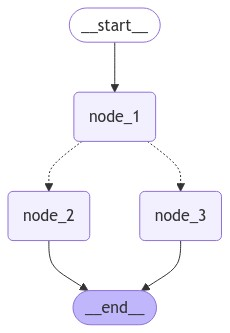

In [77]:

import random
from typing import Literal

def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}

def decide_mood(state) -> Literal["node_2", "node_3"]:
    
    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state'] 
    
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"
    
    # 50% of the time, we return Node 3
    return "node_3"
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [76]:
graph.invoke({'graph_state':'Hi I AM GOD '})


---Node 1---
---Node 2---


{'graph_state': 'Hi I AM GOD  I am happy!'}

# Module 2

In [84]:
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content="Hello how are you?", name='Model')]
messages.append(HumanMessage(content="I am doing okay. I would like to know what is a Saturday in china?", name='Aleem'))
from pprint import pprint
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

Hello how are you?
================================ Human Message =================================
Name: Aleem

I am doing okay. I would like to know what is a Saturday in china?


In [86]:
res = llm.invoke(messages)

In [91]:

def multiply(a: str, b: str) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

In [92]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Lance")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_e3MNebRl0WV2SYzFkP0kmXKX', 'function': {'arguments': '{\n  "a": "2",\n  "b": "3"\n}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4-32k'}, id='run-98d1d66a-4bdf-4604-ad0a-38f10e283ea8-0', tool_calls=[{'name': 'multiply', 'args': {'a': '2', 'b': '3'}, 'id': 'call_e3MNebRl0WV2SYzFkP0kmXKX', 'type': 'tool_call'}])

In [93]:
tool_call.tool_calls

[{'name': 'multiply',
  'args': {'a': '2', 'b': '3'},
  'id': 'call_e3MNebRl0WV2SYzFkP0kmXKX',
  'type': 'tool_call'}]

In [96]:
from langchain_core.messages import AnyMessage
from typing import List, Annotated
from langgraph.graph.message import add_messages
class MessageState(TypedDict):
    messages: Annotated[List[AnyMessage], add_messages]
    




Langgraph also supports this basic functionality of list of messages as state, and applying an append reducer

In [122]:

from langgraph.graph import MessagesState

# class MessagesState(MessagesState):
#     pass




In [99]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='e00115b7-34df-4971-8943-bb2bb723a0fd'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='d7bf777b-dd50-414c-ba93-3c8dbba4bcca'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='b9f9bead-4233-4c3e-a0b5-5b77ccd688c8')]

In [100]:
initial_messages.append(new_message)
initial_messages

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='e00115b7-34df-4971-8943-bb2bb723a0fd'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='d7bf777b-dd50-414c-ba93-3c8dbba4bcca'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='b9f9bead-4233-4c3e-a0b5-5b77ccd688c8')]

Now we are done seeing how the messages are created, so we will move on to see how the tool calls can be added with an LLM call, and how to buidl the graph

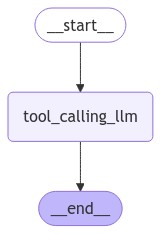

In [123]:
def tool_calling_llm (state: MessagesState):
    return {'messages': llm_with_tools.invoke(state['messages'])}

from langgraph.graph import StateGraph, START, END

builder = StateGraph(MessagesState)

builder.add_node('tool_calling_llm', tool_calling_llm)
builder.add_edge(START, 'tool_calling_llm')
builder.add_edge('tool_calling_llm', END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))




In [127]:
ms = graph.invoke({'messages': HumanMessage(content="hey waht is a 2x3")})

for m in ms['messages']:
    # print(type(m))
    m.pretty_print()


================================ Human Message =================================

hey waht is a 2x3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_e3MNebRl0WV2SYzFkP0kmXKX)
 Call ID: call_e3MNebRl0WV2SYzFkP0kmXKX
  Args:
    a: 2
    b: 3


In [125]:
MessagesState({'messageas': ['Yooooo'] }).

{'messageas': ['Yooooo']}